In [15]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[: , [0,1,2,3]]
y = iris.target
print('Class labels:' , np.unique(y))

Class labels: [0 1 2]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=1 , stratify = y)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 400 , eta0 = 0.1 , random_state=1)
ppn.fit(X_train_std , y_train)

Perceptron(eta0=0.1, max_iter=400, random_state=1)

In [20]:
y_pred = ppn.predict(X_test_std)
print('Errori: %d' % (y_test != y_pred).sum())

Errori: 2


In [21]:
from sklearn.metrics import accuracy_score
print('Accuratezza %.2f' % accuracy_score(y_test , y_pred))

Accuratezza 0.96


Questo qui sotto gira solo se uso solo due Feature, altrimenti va a fanculo tutti

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y, classifier , resolution = 0.02 , test_idx=None):
    markers = ('s','x','o','^','v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    x1_min , x1_max = X[:,0].min()-1 , X[:, 0].max()+1
    x2_min , x2_max = X[:,1].min()-1 , X[:, 1].max()+1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution) , np.arange(x2_min , x2_max , resolution))
    Z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , Z , alpha=0.3 , cmap=cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    for idx, cl , in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl , 0],y=X[y==cl , 1], alpha=0.8 , c=colors[idx], marker=markers[idx], label=cl , edgecolor='black')
        if test_idx:
            X_test , y_test = X[test_idx , :] , y[test_idx]
            plt.scatter(X_test[: , 0] , X_test[: , 1] , c='None' , 
                        edgecolor = 'black' , alpha=1.0 , linewidth = 1 , 
                       marker='o' , s=100 , label='test set')

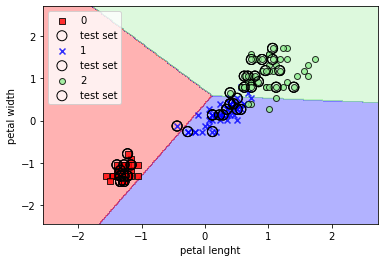

In [14]:
X_combined_std = np.vstack((X_train_std , X_test_std))
y_combined = np.hstack((y_train , y_test))
plot_decision_regions(X=X_combined_std , y=y_combined , classifier=ppn ,
                     test_idx=range(105,150))
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()